# Homicides

Uses homicides per 100,000 people data from the World Bank to find the latest year in which there are data for selected geographies.

In [1]:
import pandas as pd

df = pd.read_csv('homicides (world bank).csv', skiprows=3)
df.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'], axis=1, inplace=True)
df.rename(columns = {'Country Name': 'name'}, inplace=True)
df.head()

,name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.930614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.500000,10.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.975262,6.692419,6.800695,6.743573,7.180397,6.594439,4.022498,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.100000,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.458235,4.102248,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Latest values

In [2]:
latest_years = []
latest_values = []

for name in df.name:
    years = df.columns[1:] # a list of years
    valid_years = [] # a list to fill with non-na value years

    for year in years: # iterates through years to create a list of years with non-na values
        value = df.loc[df.name==name, year].values[0]
        if not pd.isna(value):
            valid_years.append(year)

    try: # finds the latest non-na year 
        latest_year = max(valid_years)
    except:
        latest_year = '2023'
        
    latest_value = df.loc[df.name==name, latest_year].values[0] # finds the latest non-na value
    latest_years.append(latest_year)
    latest_values.append(latest_value)

new_df = pd.DataFrame({'name': df.name, 'year': latest_years, 'value': latest_values})
new_df.head()

,name,year,value
0,Aruba,2014,1.930614
1,Africa Eastern and Southern,2015,10.300000
2,Afghanistan,2021,4.022498
3,Africa Western and Central,2015,8.100000
4,Angola,2016,4.102248


## Regions

In [3]:
regions = ['Latin America & Caribbean', 'Europe & Central Asia', 'North America', 'East Asia & Pacific', 'Middle East & North Africa', 'Sub-Saharan Africa']
regional_df = new_df[new_df['name'].isin(regions)]
regional_df.insert(1, 'type', 'region')
regional_df

,name,type,year,value
63,East Asia & Pacific,region,2021,0.9
65,Europe & Central Asia,region,2021,2.5
134,Latin America & Caribbean,region,2021,19.5
153,Middle East & North Africa,region,2021,3.9
170,North America,region,2021,6.3
217,Sub-Saharan Africa,region,2021,13.9


## Countries

In [4]:
countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Uruguay',
             'Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama',
             'Cuba', 'Dominican Republic', 'Haiti', 'Puerto Rico']
country_df = new_df[new_df['name'].isin(countries)]
country_df.insert(1, 'type', 'country')
country_df.head()

,name,type,year,value
9,Argentina,country,2021,4.622679
26,Belize,country,2021,31.247578
28,Bolivia,country,2021,3.493530
29,Brazil,country,2020,22.384065
39,Chile,country,2021,3.632039


## Combine dataframes

In [5]:
combined_df = pd.concat([regional_df, country_df]).reset_index(drop=True)
combined_df.head()

,name,type,year,value
0,East Asia & Pacific,region,2021,0.9
1,Europe & Central Asia,region,2021,2.5
2,Latin America & Caribbean,region,2021,19.5
3,Middle East & North Africa,region,2021,3.9
4,North America,region,2021,6.3


## Save dataframe

In [6]:
combined_df.to_csv('homicides.csv', index=False, sep=',', header=True)

## Visualize results

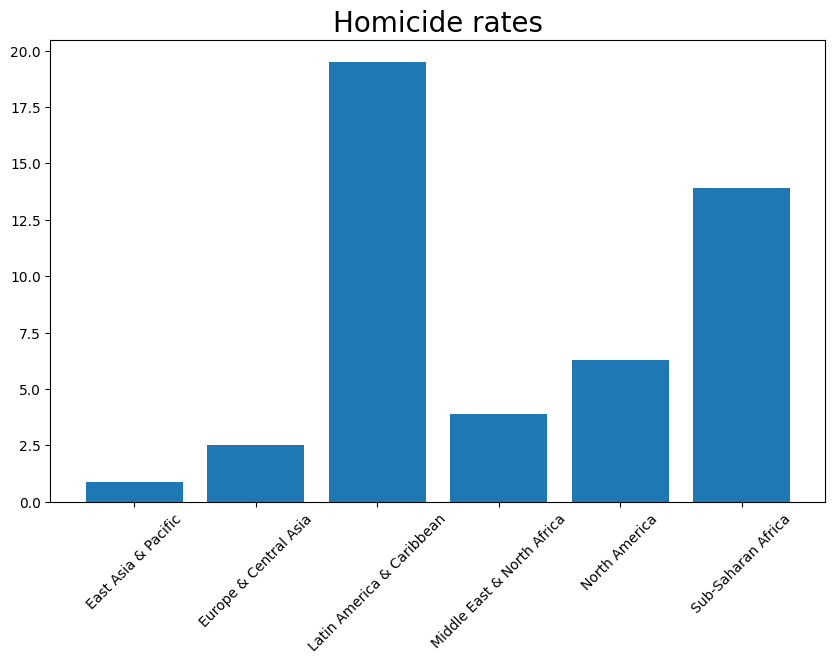

In [23]:
import matplotlib.pyplot as plt

filtered_df = combined_df[combined_df['type'] == 'region']
plt.figure(figsize=(10, 6));
plt.bar(filtered_df.name, filtered_df.value);
plt.title('Homicide rates', size = 20);
plt.xticks(rotation=45);